<a href="https://colab.research.google.com/github/lewinskie254/eda/blob/main/Anova_Link_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statistics as stat
import scipy.stats as stats

In [74]:
#one way anova is categorical to numeric relationships
df = pd.read_csv("http://ishelp.info/data/bikebuyers.csv")

In [75]:
from scipy.stats import f

#anova the heck outta this
#first the f statistic

# number of predictors
k = 2
n = len(df)

# degrees of freedom
dfn = k
dfd = n - k - 1

# F critical at 95% confidence
f_critical = f.ppf(0.95, dfn, dfd)
print("F-critical:", f_critical)
df.columns

F-critical: 3.004751748095738


Index(['ID', 'Marital Status', 'Gender', 'MaritalStatusNumeric',
       'GenderNumeric', 'Income', 'Children', 'EducationNumeric',
       'CommuteDistanceNumeric', 'Cars', 'Age', 'HomeOwnerNumeric',
       'PurchaseBikeNumeric', 'Education', 'Occupation', 'Home Owner',
       'Commute Distance', 'Region', 'Purchased Bike'],
      dtype='object')

In [4]:
from scipy.stats import f_oneway

#one way anova
f, p = f_oneway(df['Income'], df['EducationNumeric'])
f

np.float64(3262.0183077262877)

In [5]:
df['Education'].unique()

array(['Bachelors', 'Graduate Degree', 'High School', 'Partial College',
       'Partial High School'], dtype=object)

In [6]:
df['EducationNumeric'] = df['Education']

df.EducationNumeric.replace(
    ['Bachelors', 'Graduate Degree', 'High School', 'Partial College',
       'Partial High School'],
    [1, 2, 3, 4, 5],
    inplace=True
)

/tmp/ipython-input-2500618915.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.EducationNumeric.replace(
/tmp/ipython-input-2500618915.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.EducationNumeric.replace(


In [7]:
df['Commute_rank'] = df['Commute Distance'].replace(
    ['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles'],
    [0, 1, 2, 5, 10]
)

/tmp/ipython-input-2173514330.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Commute_rank'] = df['Commute Distance'].replace(


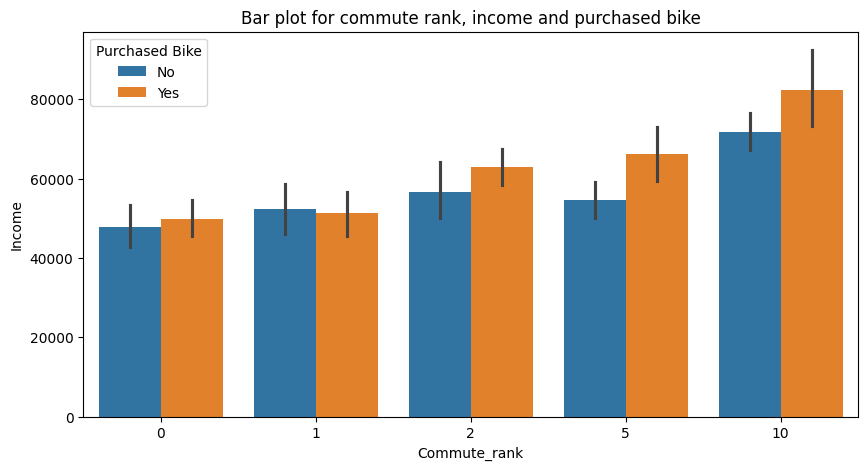

In [8]:
plt.figure(figsize=(10, 5))
plt.title("Bar plot for commute rank, income and purchased bike")
sns.barplot(
    data=df,
    x='Commute_rank',
    y='Income',
    hue='Purchased Bike',
);


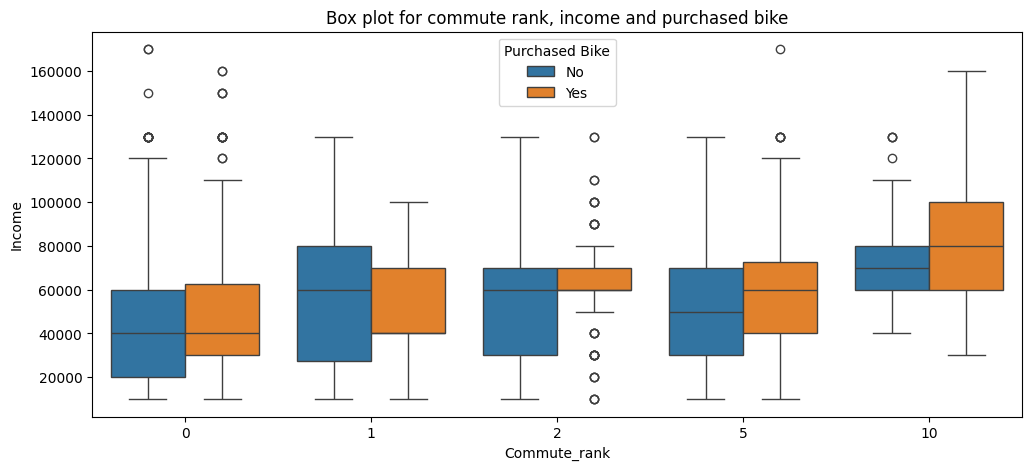

In [9]:
#box plot
plt.figure(figsize=(12, 5))
plt.title("Box plot for commute rank, income and purchased bike")
sns.boxplot(
    data=df,
    x='Commute_rank',
    y='Income',
    hue='Purchased Bike',
);


Text(0.5, 1.0, 'Bike Purchases by Commute Rank')

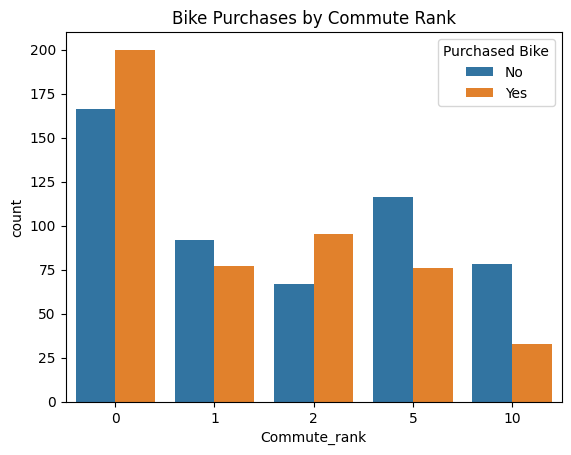

In [10]:
sns.countplot(data=df, x='Commute_rank', hue='Purchased Bike')
plt.title("Bike Purchases by Commute Rank")

/tmp/ipython-input-2619476432.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz.set_xticklabels(viz.get_xticklabels(), rotation=45);  # rotate by 45 degrees


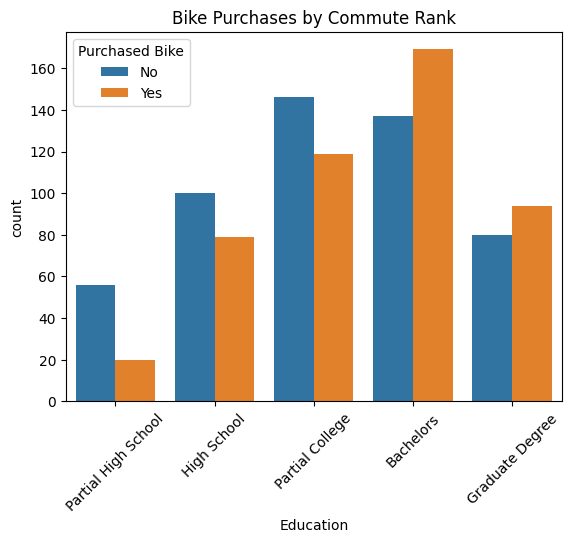

In [11]:
viz = sns.countplot(data=df, x='Education', hue='Purchased Bike', order=['Partial High School', 'High School', 'Partial College','Bachelors', 'Graduate Degree']);
viz.set_xticklabels(viz.get_xticklabels(), rotation=45);  # rotate by 45 degrees
plt.title("Bike Purchases by Commute Rank")
plt.show()

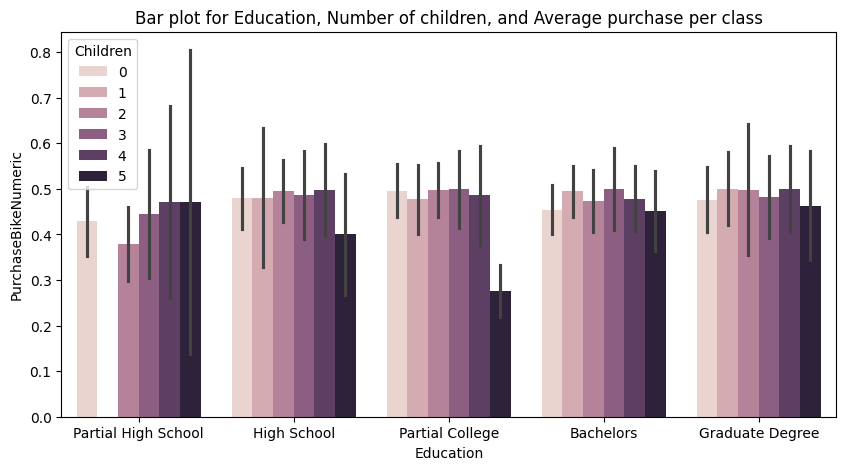

In [12]:
plt.figure(figsize=(10, 5))
plt.title("Bar plot for Education, Number of children, and Average purchase per class")
sns.barplot(
    data=df,
    x='Education',
    y='PurchaseBikeNumeric',
    hue='Children',
    order=['Partial High School', 'High School', 'Partial College','Bachelors', 'Graduate Degree'],
    estimator = np.std, #to see the spread of the data
    errorbar= 'se'
);

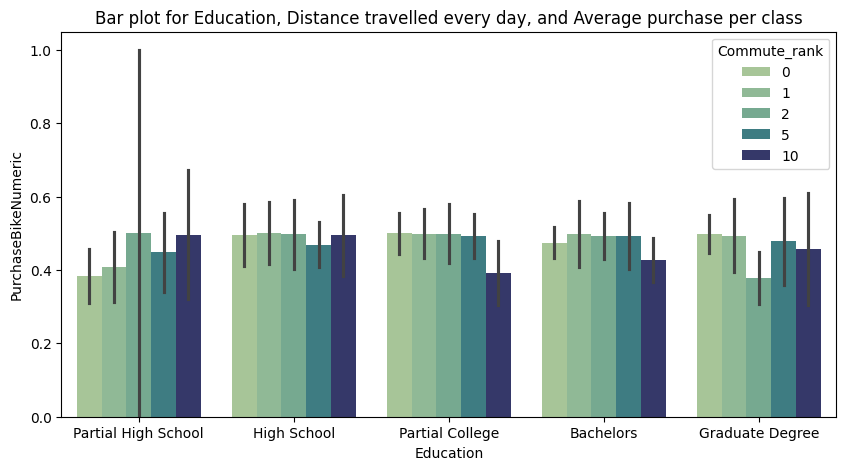

In [13]:
plt.figure(figsize=(10, 5))
plt.title("Bar plot for Education, Distance travelled every day, and Average purchase per class")
sns.barplot(
    data=df,
    x='Education',
    y='PurchaseBikeNumeric',
    hue='Commute_rank',
    order=['Partial High School', 'High School', 'Partial College','Bachelors', 'Graduate Degree'],
    estimator = np.std, #to see the spread of the data
    errorbar= 'se',
    palette='crest'
);

In [14]:
df.columns

Index(['ID', 'Marital Status', 'Gender', 'MaritalStatusNumeric',
       'GenderNumeric', 'Income', 'Children', 'EducationNumeric',
       'CommuteDistanceNumeric', 'Cars', 'Age', 'HomeOwnerNumeric',
       'PurchaseBikeNumeric', 'Education', 'Occupation', 'Home Owner',
       'Commute Distance', 'Region', 'Purchased Bike', 'Commute_rank'],
      dtype='object')

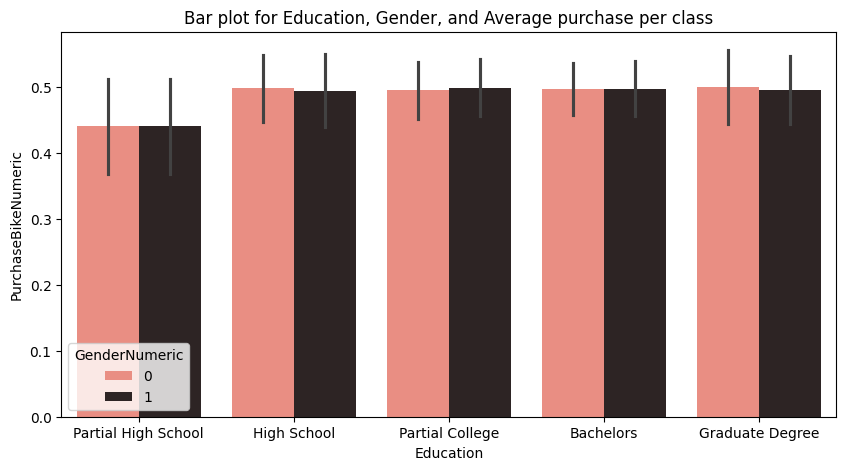

In [15]:
plt.figure(figsize=(10, 5))
plt.title("Bar plot for Education, Gender, and Average purchase per class")
sns.barplot(
    data=df,
    x='Education',
    y='PurchaseBikeNumeric',
    hue='GenderNumeric',
    order=['Partial High School', 'High School', 'Partial College','Bachelors', 'Graduate Degree'],
    estimator = np.std, #to see the spread of the data
    errorbar= 'se',
    palette="dark:salmon_r",
);

#shows no influence of gender on bike purchases

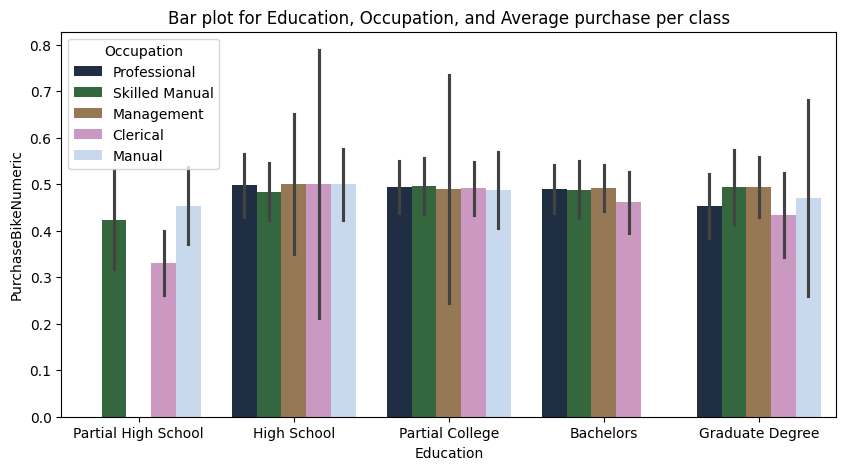

In [16]:
plt.figure(figsize=(10, 5))
plt.title("Bar plot for Education, Occupation, and Average purchase per class")
sns.barplot(
    data=df,
    x='Education',
    y='PurchaseBikeNumeric',
    hue='Occupation',
    order=['Partial High School', 'High School', 'Partial College','Bachelors', 'Graduate Degree'],
    estimator = np.std, #to see the spread of the data
    errorbar= 'se',
    palette='cubehelix'
);

#shows no influence of gender on bike purchases

/tmp/ipython-input-2393658451.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz.set_xticklabels(viz.get_xticklabels(), rotation=45)


[Text(0, 0, 'Partial High School'),
 Text(1, 0, 'High School'),
 Text(2, 0, 'Partial College'),
 Text(3, 0, 'Bachelors'),
 Text(4, 0, 'Graduate Degree')]

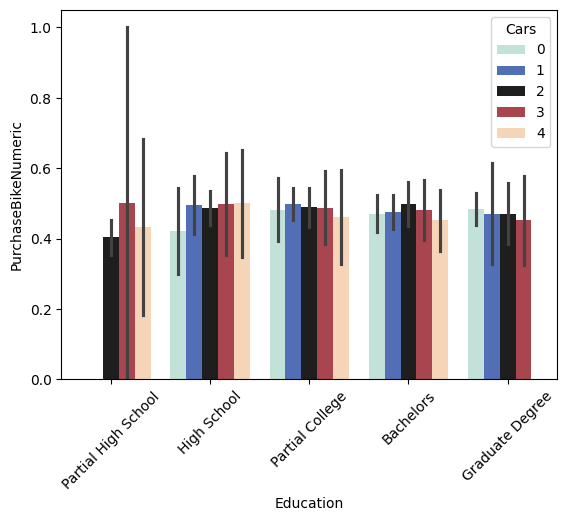

In [17]:
viz = sns.barplot(
    data=df,
    x='Education',
    y='PurchaseBikeNumeric',
    hue='Cars',
    order=['Partial High School', 'High School', 'Partial College','Bachelors', 'Graduate Degree'],
    estimator = np.std, #to see the spread of the data
    errorbar= 'se',
    palette='icefire'
);
viz.set_xticklabels(viz.get_xticklabels(), rotation=45)

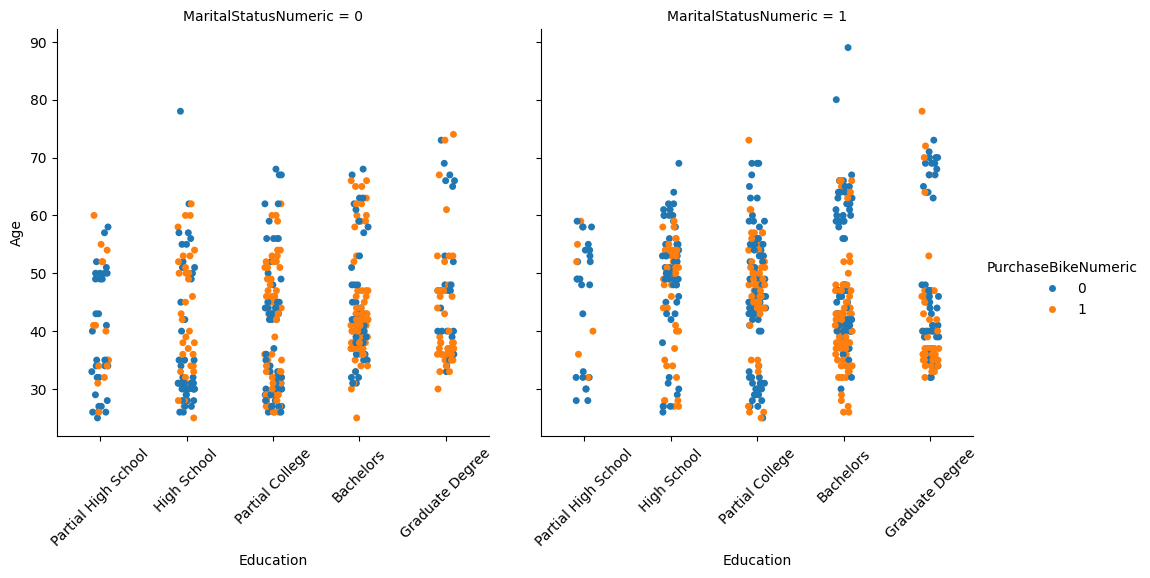

In [18]:
viz = sns.catplot(
    data=df,
    x='Education',
    y='Age',
    col='MaritalStatusNumeric',
    hue='PurchaseBikeNumeric',
    order=['Partial High School', 'High School', 'Partial College','Bachelors', 'Graduate Degree'],
    estimator = np.median, #to see the spread of the data
    errorbar= 'se',
);
viz.set_xticklabels(rotation=45)

#cat plot to see how the age and gender and other numeric features interact

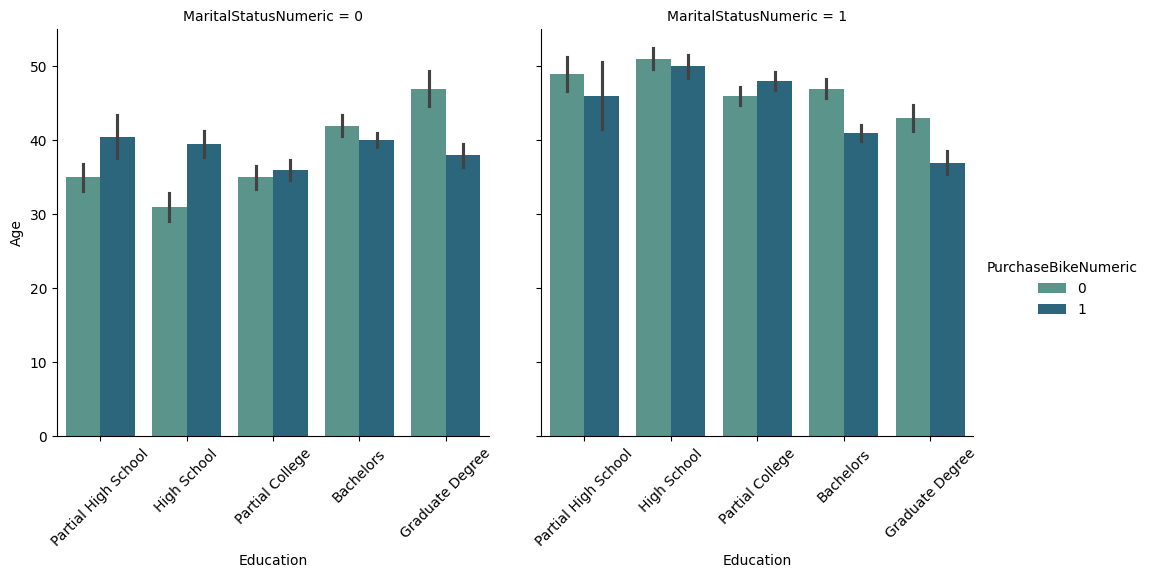

In [19]:
viz = sns.catplot(
    data=df,
    x='Education',
    y='Age',
    col='MaritalStatusNumeric',
    hue='PurchaseBikeNumeric',
    order=['Partial High School', 'High School', 'Partial College','Bachelors', 'Graduate Degree'],
    estimator = np.median, #to see the spread of the data
    errorbar= 'se',
    kind='bar',
    palette='crest'
);
viz.set_xticklabels(rotation=45);

#cat plot, kind bar graph to see how the age and gender and other numeric features interact

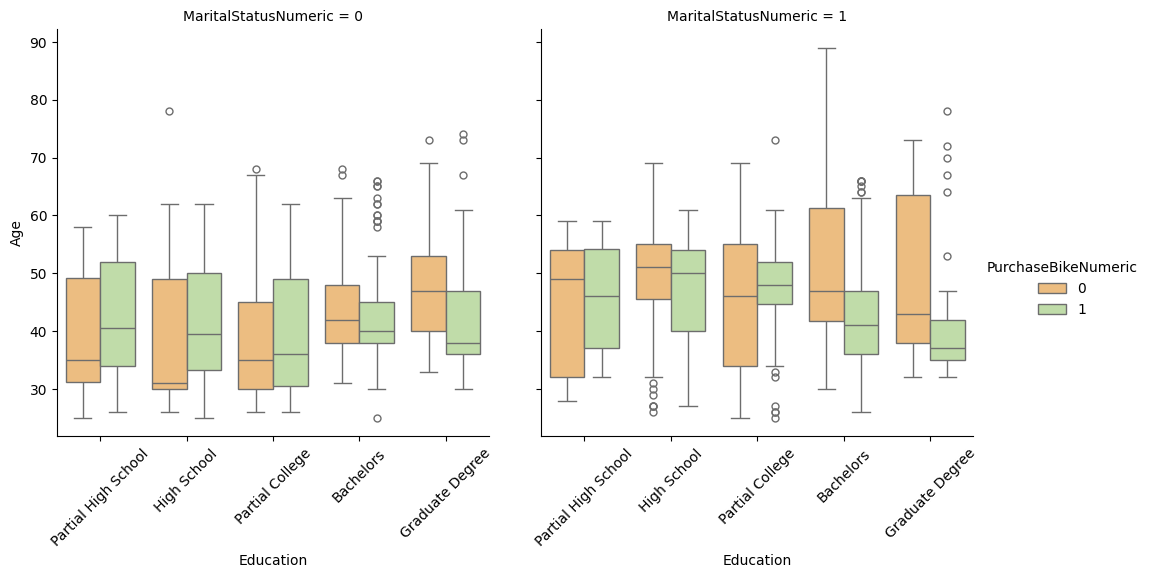

In [20]:
viz = sns.catplot(
    data=df,
    x='Education',
    y='Age',
    col='MaritalStatusNumeric',
    hue='PurchaseBikeNumeric',
    order=['Partial High School', 'High School', 'Partial College','Bachelors', 'Graduate Degree'],
    estimator = np.median, #to see the spread of the data
    errorbar= 'se',
    kind='box',
    palette='Spectral'
);
viz.set_xticklabels(rotation=45);

#cat plot, kind Box Plot to see how the age and gender and other numeric features interact

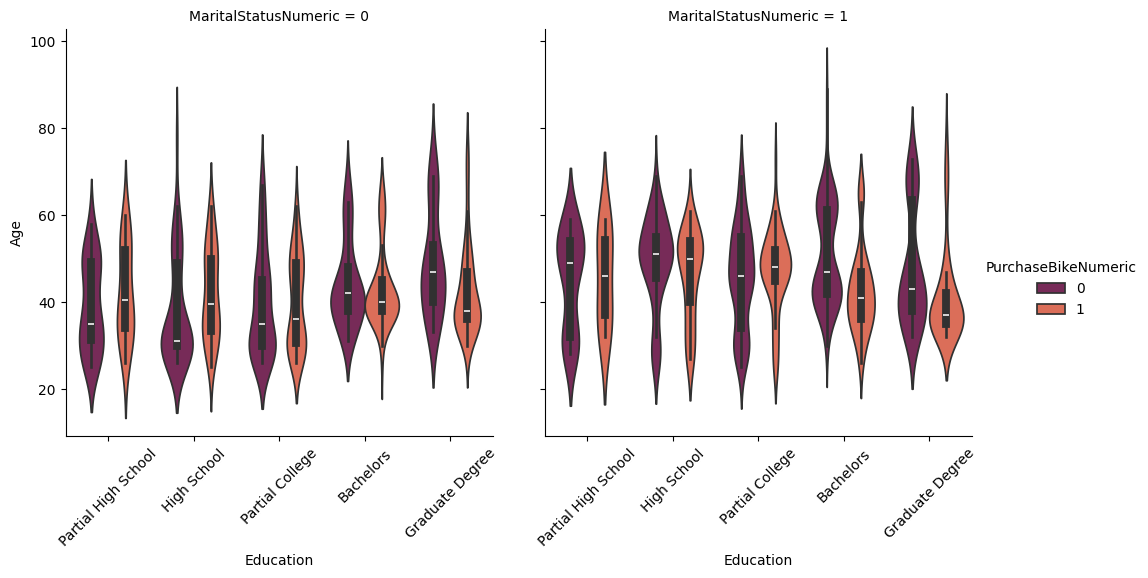

In [21]:
viz = sns.catplot(
    data=df,
    x='Education',
    y='Age',
    col='MaritalStatusNumeric',
    hue='PurchaseBikeNumeric',
    order=['Partial High School', 'High School', 'Partial College','Bachelors', 'Graduate Degree'],
    estimator = np.median, #to see the spread of the data
    errorbar= 'se',
    kind='violin',
    palette='rocket'
);
viz.set_xticklabels(rotation=45);

#cat plot, kind Violin Plot to see how the age and gender and other numeric features interact

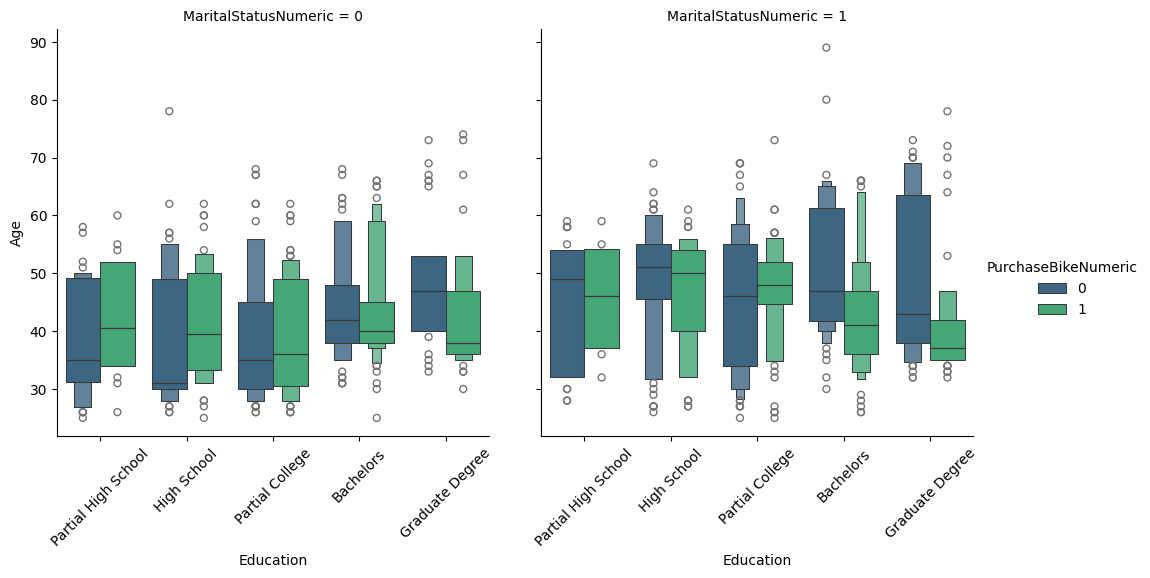

In [22]:
viz = sns.catplot(
    data=df,
    x='Education',
    y='Age',
    col='MaritalStatusNumeric',
    hue='PurchaseBikeNumeric',
    order=['Partial High School', 'High School', 'Partial College','Bachelors', 'Graduate Degree'],
    estimator = np.median, #to see the spread of the data
    errorbar= 'se',
    kind='boxen',
    palette='viridis'
);
viz.set_xticklabels(rotation=45);

#cat plot, kind Violin Plot to see how the age and gender and other numeric features interact

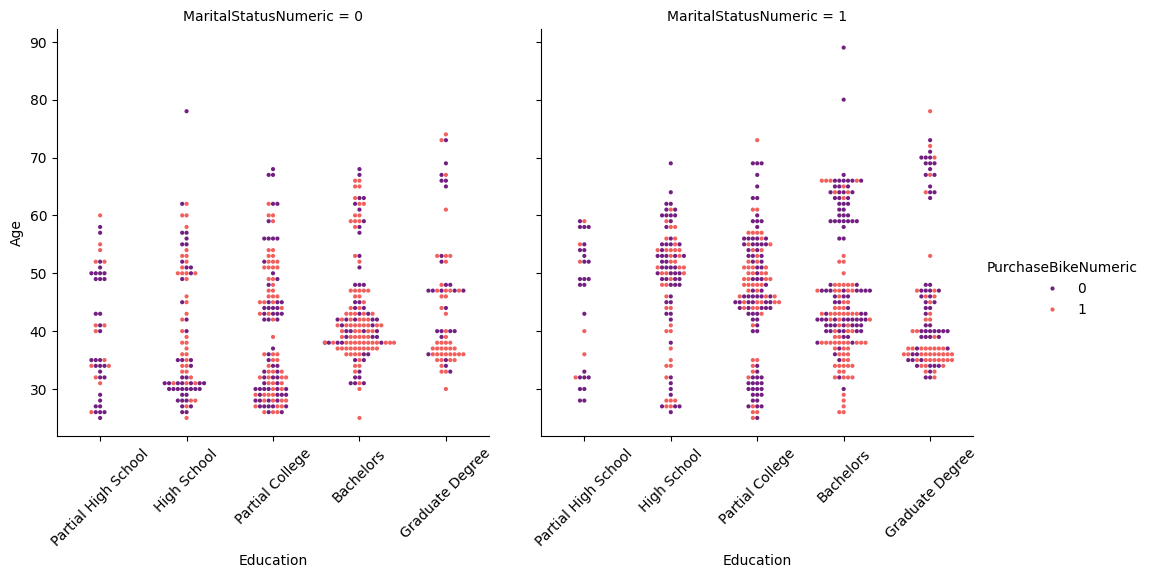

In [23]:
viz = sns.catplot(
    data=df,
    x='Education',
    y='Age',
    col='MaritalStatusNumeric',
    hue='PurchaseBikeNumeric',
    order=['Partial High School', 'High School', 'Partial College','Bachelors', 'Graduate Degree'],
    estimator = np.median, #to see the spread of the data
    errorbar= 'se',
    kind='swarm',
    palette='magma',
    size=3  # smaller markers
);
viz.set_xticklabels(rotation=45);

#cat plot, kind Violin Plot to see how the age and gender and other numeric features interact

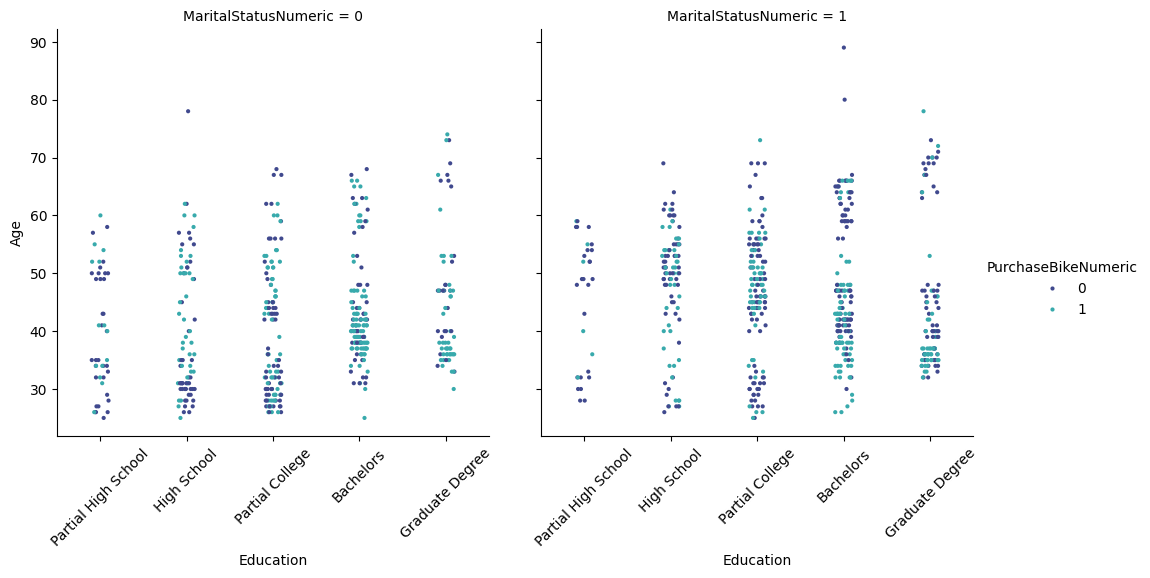

In [24]:
viz = sns.catplot(
    data=df,
    x='Education',
    y='Age',
    col='MaritalStatusNumeric',
    hue='PurchaseBikeNumeric',
    order=['Partial High School', 'High School', 'Partial College','Bachelors', 'Graduate Degree'],
    estimator = np.median, #to see the spread of the data
    errorbar= 'se',
    kind='strip',
    palette='mako',
    size=3  # smaller markers
);
viz.set_xticklabels(rotation=45);

#cat plot, kind Violin Plot to see how the age and gender and other numeric features interact

In [35]:
import torch
x = torch.tensor([[[[42, 45],[45,42]]]])   # shape (1,1,1)

print(x.shape)
# torch.Size([1, 1, 1])

y = x.squeeze()
print(y.shape)
# torch.Size([])  # all size-1 dims removed

print(y)
# tensor(42)


torch.Size([1, 1, 2, 2])
torch.Size([2, 2])
tensor([[42, 45],
        [45, 42]])


In [37]:
x = x.numpy()

In [38]:
x.shape

(1, 1, 2, 2)

In [39]:
x.flatten()

array([42, 45, 45, 42])

In [40]:
df.EducationNumeric.unique()

array([1, 2, 3, 4, 5])

In [41]:
df.columns

Index(['ID', 'Marital Status', 'Gender', 'MaritalStatusNumeric',
       'GenderNumeric', 'Income', 'Children', 'EducationNumeric',
       'CommuteDistanceNumeric', 'Cars', 'Age', 'HomeOwnerNumeric',
       'PurchaseBikeNumeric', 'Education', 'Occupation', 'Home Owner',
       'Commute Distance', 'Region', 'Purchased Bike', 'Commute_rank'],
      dtype='object')

In [44]:
df.Region.unique()

array(['North America', 'Europe', 'Pacific'], dtype=object)

In [48]:
df['RegionNumeric'] = df['Region'].replace(['North America', 'Europe', 'Pacific'], [1, 2, 3])

/tmp/ipython-input-1020344741.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RegionNumeric'] = df['Region'].replace(['North America', 'Europe', 'Pacific'], [1, 2, 3])


In [56]:
df['EducationNumeric'].unique()

array([1, 2, 3, 4, 5])

Text(0.5, 1.0, 'Bike Purchases by Region')

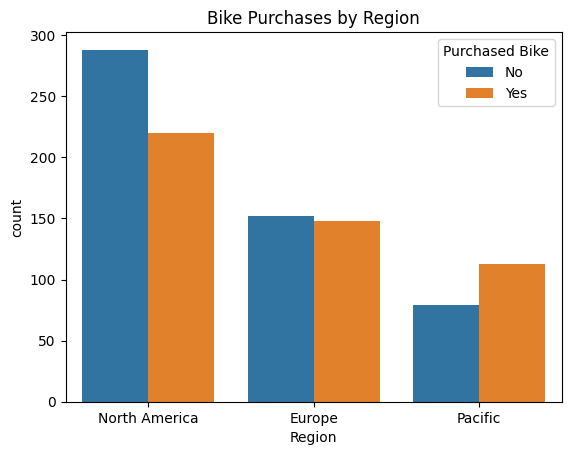

In [52]:
#purchased by region

sns.countplot(data=df, x='Region', hue='Purchased Bike')
plt.title("Bike Purchases by Region")

In [58]:
r, p = stats.pearsonr(df['EducationNumeric'], df['PurchaseBikeNumeric'], )
r, p

(np.float64(-0.14127720603529947), np.float64(7.308503459935669e-06))

In [65]:
f, p = stats.f_oneway(df['EducationNumeric'], df['PurchaseBikeNumeric'])
f, p

(np.float64(2219.623326946988), np.float64(0.0))

/tmp/ipython-input-567091769.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz.set_xticklabels(x, rotation=45);


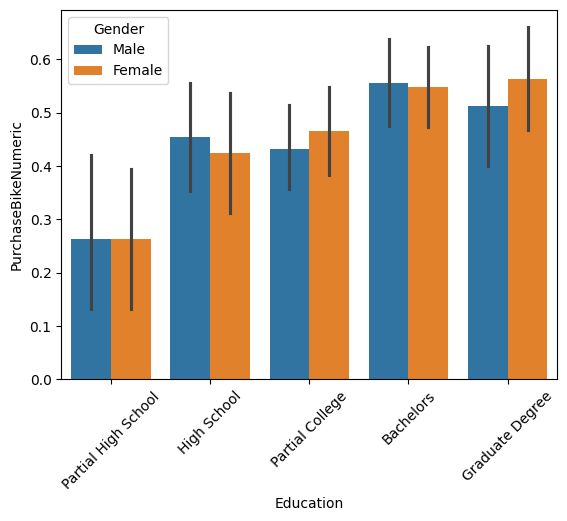

In [78]:
viz = sns.barplot(df, x='Education', y='PurchaseBikeNumeric', order=['Partial High School', 'High School', 'Partial College','Bachelors', 'Graduate Degree'], hue='Gender');
x= viz.get_xticklabels()
viz.set_xticklabels(x, rotation=45);

In [72]:
df[df['Education'] == 'Partial High School']['PurchaseBikeNumeric'].mean()

np.float64(0.2631578947368421)

In [73]:
df[df['Education'] == 'Graduate Degree']['PurchaseBikeNumeric'].mean()

np.float64(0.5402298850574713)

In [81]:
#segway into multi comparisons

from statsmodels.stats.multicomp import MultiComparison

In [88]:
mc = MultiComparison(df['PurchaseBikeNumeric'], df['Education'])

In [89]:
print(mc.tukeyhsd())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1            group2       meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
      Bachelors     Graduate Degree  -0.0121  0.999 -0.1404  0.1163  False
      Bachelors         High School  -0.1109 0.1204 -0.2381  0.0162  False
      Bachelors     Partial College  -0.1032 0.0942 -0.2166  0.0102  False
      Bachelors Partial High School  -0.2891 0.0001 -0.4623 -0.1159   True
Graduate Degree         High School  -0.0989 0.3297 -0.2428   0.045  False
Graduate Degree     Partial College  -0.0912 0.3236  -0.223  0.0407  False
Graduate Degree Partial High School  -0.2771 0.0005 -0.4629 -0.0913   True
    High School     Partial College   0.0077 0.9998  -0.123  0.1385  False
    High School Partial High School  -0.1782 0.0655 -0.3632  0.0068  False
Partial College Partial High School  -0.1859 0.0322 -0.3617 -0.0101   True
-------------------------